In [1]:
import requests 
import numpy as np
import bs4
url = 'https://www.rugbyhow.com/2015RWC-all-player-sizes.html'

s = requests.get(url).text

In [2]:
b = bs4.BeautifulSoup(s,'html.parser')

In [3]:
tables = b.find_all('span')
mytable = tables

In [4]:
mytable

[<span class="ezoic-ad box-2" data-ez-name="rugbyhow_com-box-2" style="display:inline-block;float:none;margin-bottom:2px !important;margin-left:0px !important;margin-right:0px !important;margin-top:2px !important;min-height:110px;min-width:728px;"><span class="ezoic-ad" ezah="90" ezaw="728" id="div-gpt-ad-rugbyhow_com-box-2-0" style="position:relative;z-index:501;display:inline-block;min-height:90px;min-width:728px;"><script data-cfasync="false" style="display:none;" type="text/javascript">eval(ez_write_tag([[728,90],'rugbyhow_com-box-2','ezslot_2',224,'0','0']));</script></span></span>,
 <span class="ezoic-ad" ezah="90" ezaw="728" id="div-gpt-ad-rugbyhow_com-box-2-0" style="position:relative;z-index:501;display:inline-block;min-height:90px;min-width:728px;"><script data-cfasync="false" style="display:none;" type="text/javascript">eval(ez_write_tag([[728,90],'rugbyhow_com-box-2','ezslot_2',224,'0','0']));</script></span>,
 <span class="ezoic-ad medrectangle-3" data-ez-name="rugbyhow_co

In [5]:
del mytable[0:8]

In [6]:
del mytable[4:]

In [7]:
mytable

[<span cwidth="0" eza="span_added_for_text:yes;cwidth:0px;;cheight:0px;;do_recalc:1;wcalc_source:defined;wcalc:0px;wocalc:504px;hcalc:3497px;rend_px_area:0;" style="background-color:transparent;background-size:auto;nodepath:/html/body/div[1]/div[2]/div/div/reportblock[1]/span[1];pagepos:95;span_added_for_text:yes;cwidth:504;cheight:0px;do_recalc:1;wcalc_source:defined;wcalc:0px;wocalc:504px;hcalc:3497;rend_px_area:0;rcnt:2;ez_min_text_wdth:172;req_px_area:1844640;obj_px_area:0;req_px_height:20px;req_margin_and_padding:0;req_ns_height:;vertical_margin:0;parent-line-height:20px;margin-for-scale:0px 0px 0px 0px;padding-for-scale:0px 0px 0px 0px; word-break:break-word; ">
 			Pos EBF H-met W-met H-imp lbs st-lb Player name<br/>
 			=== === ===== ===== ===== ========= ===========<br/>
 			S 1 558 190cm 106kg 6' 3" 234 16s10 Afatia,Viliamu<br/>
 			S 9 387 168cm 65 kg 5' 6" 143 10s 3 Afemai,Vavao<br/>
 			i 1 584 185cm 108kg 6' 1" 238 17s 0 Aguero,Matias<br/>
 			a11 508 181cm 92 kg 5'11" 20

Think of EBF as a measurement of agility

In [8]:
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

In [9]:
for table in range(len(mytable)):
    mytable[table] = cleanhtml(str(mytable[table]))

In [10]:
mytable = ''.join(table for table in mytable)

In [11]:
mytable = mytable.split('\n')

In [12]:
del mytable[0]

In [13]:
mytable = [line.replace('\t','') for line in mytable]
mytable = [line.replace('\\','') for line in mytable]

In [14]:
mydb = [column.split(' ') for column in mytable]

In [15]:
del mydb[1]
del mydb[-1]
mydb

[['Pos', 'EBF', 'H-met', 'W-met', 'H-imp', 'lbs', 'st-lb', 'Player', 'name'],
 ['S',
  '1',
  '558',
  '190cm',
  '106kg',
  "6'",
  '3"',
  '234',
  '16s10',
  'Afatia,Viliamu'],
 ['S',
  '9',
  '387',
  '168cm',
  '65',
  'kg',
  "5'",
  '6"',
  '143',
  '10s',
  '3',
  'Afemai,Vavao'],
 ['i',
  '1',
  '584',
  '185cm',
  '108kg',
  "6'",
  '1"',
  '238',
  '17s',
  '0',
  'Aguero,Matias'],
 ['a11',
  '508',
  '181cm',
  '92',
  'kg',
  '5\'11"',
  '203',
  '14s',
  '7',
  'Agulla,Horacio'],
 ['R',
  '6',
  '625',
  '192cm',
  '120kg',
  "6'",
  '4"',
  '265',
  '18s13',
  'Alberts,Willem'],
 ['a',
  '4',
  '588',
  '199cm',
  '117kg',
  "6'",
  '6"',
  '258',
  '18s',
  '6',
  'Alemanno,Matias'],
 ['i10',
  '463',
  '188cm',
  '87',
  'kg',
  "6'",
  '2"',
  '192',
  '13s10',
  'Allan,Tomasso'],
 ['W12', '528', '193cm', '102kg', "6'", '4"', '225', '16s', '1', 'Allen,Cory'],
 ['Y',
  '6',
  '471',
  '172cm',
  '81',
  'kg',
  "5'",
  '8"',
  '179',
  '12s11',
  'Alonso,Agustin'],
 ['

In [16]:
import copy

In [17]:
checkpt = copy.copy(mydb)

In [18]:
mydb = checkpt

In [19]:
del mydb[0][6]
mydb[0][-2] = mydb[0][-2] + ' ' + mydb[0][-1]
del mydb[0][-1]
mydb[0][2] = mydb[0][2] + '(cm)'
mydb[0][3] = mydb[0][3] + '(kg)'

In [20]:
mydb

[['Pos', 'EBF', 'H-met(cm)', 'W-met(kg)', 'H-imp', 'lbs', 'Player name'],
 ['S',
  '1',
  '558',
  '190cm',
  '106kg',
  "6'",
  '3"',
  '234',
  '16s10',
  'Afatia,Viliamu'],
 ['S',
  '9',
  '387',
  '168cm',
  '65',
  'kg',
  "5'",
  '6"',
  '143',
  '10s',
  '3',
  'Afemai,Vavao'],
 ['i',
  '1',
  '584',
  '185cm',
  '108kg',
  "6'",
  '1"',
  '238',
  '17s',
  '0',
  'Aguero,Matias'],
 ['a11',
  '508',
  '181cm',
  '92',
  'kg',
  '5\'11"',
  '203',
  '14s',
  '7',
  'Agulla,Horacio'],
 ['R',
  '6',
  '625',
  '192cm',
  '120kg',
  "6'",
  '4"',
  '265',
  '18s13',
  'Alberts,Willem'],
 ['a',
  '4',
  '588',
  '199cm',
  '117kg',
  "6'",
  '6"',
  '258',
  '18s',
  '6',
  'Alemanno,Matias'],
 ['i10',
  '463',
  '188cm',
  '87',
  'kg',
  "6'",
  '2"',
  '192',
  '13s10',
  'Allan,Tomasso'],
 ['W12', '528', '193cm', '102kg', "6'", '4"', '225', '16s', '1', 'Allen,Cory'],
 ['Y',
  '6',
  '471',
  '172cm',
  '81',
  'kg',
  "5'",
  '8"',
  '179',
  '12s11',
  'Alonso,Agustin'],
 ['a15'

In [21]:
for row in range(len(mydb)):
    if len(mydb[row][0]) == 3 and row != 0:
        mydb[row][0] = mydb[row][0][1:]
    if mydb[row][0].isalpha() and row != 0:
        del mydb[row][0]
    for entry in range(len(mydb[row])-1): 
        if entry == 2 and row != 0:
            mydb[row][entry] = mydb[row][entry].replace('cm', '')
        if entry == 3 and row != 0:
            mydb[row][entry] = mydb[row][entry].replace('kg', '')
        if mydb[row][entry] == 'kg':
            del mydb[row][entry]

In [22]:
mydb

[['Pos', 'EBF', 'H-met(cm)', 'W-met(kg)', 'H-imp', 'lbs', 'Player name'],
 ['1', '558', '190', '106', "6'", '3"', '234', '16s10', 'Afatia,Viliamu'],
 ['9', '387', '168', '65', "5'", '6"', '143', '10s', '3', 'Afemai,Vavao'],
 ['1', '584', '185', '108', "6'", '1"', '238', '17s', '0', 'Aguero,Matias'],
 ['11', '508', '181', '92', '5\'11"', '203', '14s', '7', 'Agulla,Horacio'],
 ['6', '625', '192', '120', "6'", '4"', '265', '18s13', 'Alberts,Willem'],
 ['4', '588', '199', '117', "6'", '6"', '258', '18s', '6', 'Alemanno,Matias'],
 ['10', '463', '188', '87', "6'", '2"', '192', '13s10', 'Allan,Tomasso'],
 ['12', '528', '193', '102', "6'", '4"', '225', '16s', '1', 'Allen,Cory'],
 ['6', '471', '172', '81', "5'", '8"', '179', '12s11', 'Alonso,Agustin'],
 ['15',
  '476',
  '185',
  '88',
  "6'",
  '1"',
  '194',
  '13s12',
  'Amorosino,Lucas',
  'Gonzalez'],
 ['11', '530', '185', '98', "6'", '1"', '216', '15s', '6', 'Amos,Hallam'],
 ['4', '548', '197', '108', "6'", '6"', '238', '17s', '0', 'Anton

In [23]:
for row in range(1, len(mydb)):
    try:
        if mydb[row] == ['']:
            del mydb[row]
            continue
        if mydb[row][-3].find('s') != -1:
            del mydb[row][-3], mydb[row][-2]
        if mydb[row][-2].find('s') != -1:
            del mydb[row][-2]
        if len(mydb[row]) == 8:
            del mydb[row][-2]
        if len(mydb[row]) == 7:
            mydb[row][5] = mydb[row][4] + mydb[row][5]
            del mydb[row][4]
    except IndexError:
        pass

In [24]:
mydb

[['Pos', 'EBF', 'H-met(cm)', 'W-met(kg)', 'H-imp', 'lbs', 'Player name'],
 ['1', '558', '190', '106', '6\'3"', 'Afatia,Viliamu'],
 ['9', '387', '168', '65', '5\'6"', 'Afemai,Vavao'],
 ['1', '584', '185', '108', '6\'1"', 'Aguero,Matias'],
 ['11', '508', '181', '92', '5\'11"203', 'Agulla,Horacio'],
 ['6', '625', '192', '120', '6\'4"', 'Alberts,Willem'],
 ['4', '588', '199', '117', '6\'6"', 'Alemanno,Matias'],
 ['10', '463', '188', '87', '6\'2"', 'Allan,Tomasso'],
 ['12', '528', '193', '102', '6\'4"', 'Allen,Cory'],
 ['6', '471', '172', '81', '5\'8"', 'Alonso,Agustin'],
 ['15', '476', '185', '88', '6\'1"', 'Gonzalez'],
 ['11', '530', '185', '98', '6\'1"', 'Amos,Hallam'],
 ['4', '548', '197', '108', '6\'6"', 'Antonescu,Marius'],
 ['11', '495', '186', '92', '6\'1"', 'Apostol,Adrian'],
 ['11', '497', '177', '88', '5\'10"194', 'Aptsiauri,Giorgi'],
 ['1', '581', '172', '100', '5\'8"', 'Arboleya,Carlos'],
 ['8', '570', '193', '110', '6\'4"', 'Ardron,Tyler'],
 ['11', '538', '182', '98', '6\'0"',

In [25]:
print(len(mydb))

627


In [26]:
#del mydb[0][4], mydb[0][5]
sep = '"'
for row in range(1, len(mydb)):
    try:
        if len(mydb[row][5]) > 4:
            mydb[row][5].split(mydb[row][mydb[row][5].find('"')+1])
        del mydb[row][4]
    except IndexError:
        pass

In [27]:
mydb[0][4] = 'Player Name'
del mydb[0][5], mydb[0][5]

In [28]:
mydb

[['Pos', 'EBF', 'H-met(cm)', 'W-met(kg)', 'Player Name'],
 ['1', '558', '190', '106', 'Afatia,Viliamu'],
 ['9', '387', '168', '65', 'Afemai,Vavao'],
 ['1', '584', '185', '108', 'Aguero,Matias'],
 ['11', '508', '181', '92', 'Agulla,Horacio'],
 ['6', '625', '192', '120', 'Alberts,Willem'],
 ['4', '588', '199', '117', 'Alemanno,Matias'],
 ['10', '463', '188', '87', 'Allan,Tomasso'],
 ['12', '528', '193', '102', 'Allen,Cory'],
 ['6', '471', '172', '81', 'Alonso,Agustin'],
 ['15', '476', '185', '88', 'Gonzalez'],
 ['11', '530', '185', '98', 'Amos,Hallam'],
 ['4', '548', '197', '108', 'Antonescu,Marius'],
 ['11', '495', '186', '92', 'Apostol,Adrian'],
 ['11', '497', '177', '88', 'Aptsiauri,Giorgi'],
 ['1', '581', '172', '100', 'Arboleya,Carlos'],
 ['8', '570', '193', '110', 'Ardron,Tyler'],
 ['11', '538', '182', '98', 'Ashley-Cooper,Adam'],
 ['1', '658', '184', '121', 'Asieshvili,Kakha'],
 ['1', '687', '182', '125', 'Roy'],
 ['1', '787', '197', '155', 'Atonio,Uini'],
 ['1', '659', '185', '12

In [29]:
for row in range(1, len(mydb)): 
    try:
        if len(mydb[row]) > 6:
            del mydb[row]
    except IndexError:
        flag = True

In [30]:
mydb

[['Pos', 'EBF', 'H-met(cm)', 'W-met(kg)', 'Player Name'],
 ['1', '558', '190', '106', 'Afatia,Viliamu'],
 ['9', '387', '168', '65', 'Afemai,Vavao'],
 ['1', '584', '185', '108', 'Aguero,Matias'],
 ['11', '508', '181', '92', 'Agulla,Horacio'],
 ['6', '625', '192', '120', 'Alberts,Willem'],
 ['4', '588', '199', '117', 'Alemanno,Matias'],
 ['10', '463', '188', '87', 'Allan,Tomasso'],
 ['12', '528', '193', '102', 'Allen,Cory'],
 ['6', '471', '172', '81', 'Alonso,Agustin'],
 ['15', '476', '185', '88', 'Gonzalez'],
 ['11', '530', '185', '98', 'Amos,Hallam'],
 ['4', '548', '197', '108', 'Antonescu,Marius'],
 ['11', '495', '186', '92', 'Apostol,Adrian'],
 ['11', '497', '177', '88', 'Aptsiauri,Giorgi'],
 ['1', '581', '172', '100', 'Arboleya,Carlos'],
 ['8', '570', '193', '110', 'Ardron,Tyler'],
 ['11', '538', '182', '98', 'Ashley-Cooper,Adam'],
 ['1', '658', '184', '121', 'Asieshvili,Kakha'],
 ['1', '687', '182', '125', 'Roy'],
 ['1', '787', '197', '155', 'Atonio,Uini'],
 ['1', '659', '185', '12

In [38]:
for row in range(1, len(mydb)):
    if '???' in mydb[row] or '' in mydb[row]:
        del mydb[row]

In [32]:
mydb

[['Pos', 'EBF', 'H-met(cm)', 'W-met(kg)', 'Player Name'],
 ['1', '558', '190', '106', 'Afatia,Viliamu'],
 ['9', '387', '168', '65', 'Afemai,Vavao'],
 ['1', '584', '185', '108', 'Aguero,Matias'],
 ['11', '508', '181', '92', 'Agulla,Horacio'],
 ['6', '625', '192', '120', 'Alberts,Willem'],
 ['4', '588', '199', '117', 'Alemanno,Matias'],
 ['10', '463', '188', '87', 'Allan,Tomasso'],
 ['12', '528', '193', '102', 'Allen,Cory'],
 ['6', '471', '172', '81', 'Alonso,Agustin'],
 ['15', '476', '185', '88', 'Gonzalez'],
 ['11', '530', '185', '98', 'Amos,Hallam'],
 ['4', '548', '197', '108', 'Antonescu,Marius'],
 ['11', '495', '186', '92', 'Apostol,Adrian'],
 ['11', '497', '177', '88', 'Aptsiauri,Giorgi'],
 ['1', '581', '172', '100', 'Arboleya,Carlos'],
 ['8', '570', '193', '110', 'Ardron,Tyler'],
 ['11', '538', '182', '98', 'Ashley-Cooper,Adam'],
 ['1', '658', '184', '121', 'Asieshvili,Kakha'],
 ['1', '687', '182', '125', 'Roy'],
 ['1', '787', '197', '155', 'Atonio,Uini'],
 ['1', '659', '185', '12

In [39]:
for i in range(len(mydb)):
    if len(mydb[i]) > 5:
        del mydb[i]

In [40]:
import pandas as pd

playerdf = pd.DataFrame(mydb[1:], columns = mydb[0])

In [41]:
playerdf['H-met(cm)'] = pd.to_numeric(playerdf['H-met(cm)'])
playerdf['W-met(kg)'] = pd.to_numeric(playerdf['W-met(kg)'])
playerdf['EBF'] = pd.to_numeric(playerdf['EBF'])
playerdf['Pos'] = pd.to_numeric(playerdf['Pos'])

In [42]:
playerdf['BMI'] = playerdf['W-met(kg)'][:].div(playerdf['H-met(cm)'][:].multiply(playerdf['H-met(cm)'][:]))
playerdf['BMI'] = playerdf['BMI'].multiply(10000)

In [43]:
playerdf = playerdf.reindex(columns=['Pos', 'EBF', 'BMI', 'H-met(cm)', 'W-met(kg)', 'Player Name'])
playerdf

,Pos,EBF,BMI,H-met(cm),W-met(kg),Player Name
0,1,558,29.362881,190,106,"Afatia,Viliamu"
1,9,387,23.030045,168,65,"Afemai,Vavao"
2,1,584,31.555880,185,108,"Aguero,Matias"
3,11,508,28.082171,181,92,"Agulla,Horacio"
4,6,625,32.552083,192,120,"Alberts,Willem"
...,...,...,...,...,...,...
584,2,590,34.080658,173,102,"Yuhara,Hiroki"
585,6,549,28.457140,193,106,"Zanni,Alessandro"
586,11,500,26.595745,188,94,"Zebo,Simon"
587,4,476,24.944492,191,91,"Zerbino,Jorge"


In [44]:
playerdf = playerdf.sort_values(by = ['Pos', 'EBF'], ascending = [True, True])

In [45]:
playerdf

,Pos,EBF,BMI,H-met(cm),W-met(kg),Player Name
444,1,505,27.170771,186,94,"Sanguinetti,Mateo"
577,1,536,29.263340,183,98,"Wooldridge,Doug"
0,1,558,29.362881,190,106,"Afatia,Viliamu"
311,1,568,29.916898,190,108,"Marshall,Jason"
427,1,568,30.679328,185,105,"Ravai,Peni"
...,...,...,...,...,...,...
472,15,519,27.738854,187,97,"Spedding,Scott"
351,15,528,29.667971,178,94,"Murimurivalu,Kini"
144,15,534,27.651749,193,103,"Folau,Israel"
177,15,535,28.926224,185,99,"Goromaru,Ayumu"


# Plot distributions

Create buckets for height, weight, ebf, and bmi

In [46]:
import math
import matplotlib.pyplot as plt

In [47]:
buckets={}

In [48]:
for pos in set(playerdf['Pos']):
    buckets[pos] = {'BMI': {}, 'EBF': {}, 'W-met(kg)': {}, 'H-met(cm)': {}}

for positions in playerdf:
    
    for weight in positions:
        
        if x < weight < y:
        
            buckets[W][pos][x].append(weight)

In [49]:
maxBMI = round(max(playerdf['BMI']))
minBMI = round(min(playerdf['BMI']))
rangeBMI = round(max(playerdf['BMI'])-min(playerdf['BMI']))
stepBMI = round(math.sqrt(rangeBMI))

for pos in set(playerdf['Pos']):
    for bucket in range(minBMI,maxBMI,stepBMI):
        buckets[pos]['BMI'][round(bucket)] = 0

In [50]:
for pos in set(playerdf['Pos']):
    keys = list(buckets[pos]['BMI'].keys())
    for bmi in list(playerdf.loc[playerdf['Pos']==pos]['BMI']):
        for b in range(len(keys)):
            if keys[b-1] < bmi < keys[b]:
                buckets[pos]['BMI'][keys[b-1]] += 1
                break
            if bmi > keys[-1] and keys[b]==keys[-1]:
                buckets[pos]['BMI'][keys[-1]] += 1

In [51]:
maxEBF = round(max(playerdf['EBF']))
minEBF = round(min(playerdf['EBF']))
rangeEBF = round(max(playerdf['EBF'])-min(playerdf['EBF']))
stepEBF = round(math.sqrt(rangeEBF))

for pos in set(playerdf['Pos']):
    for bucket in range(minEBF,maxEBF,stepEBF):
        buckets[pos]['EBF'][round(bucket)] = 0

In [52]:
for pos in set(playerdf['Pos']):
    keys = list(buckets[pos]['EBF'].keys())
    for ebf in list(playerdf.loc[playerdf['Pos']==pos]['EBF']):
        for b in range(len(keys)):
            if keys[b-1] < ebf < keys[b]:
                buckets[pos]['EBF'][keys[b-1]] += 1
                break
            if ebf > keys[-1] and keys[b]==keys[-1]:
                buckets[pos]['EBF'][keys[-1]] += 1

In [53]:
maxW = round(max(playerdf['W-met(kg)']))
minW = round(min(playerdf['W-met(kg)']))
rangeW = round(max(playerdf['W-met(kg)'])-min(playerdf['W-met(kg)']))
stepW = round(math.sqrt(rangeW))

for pos in set(playerdf['Pos']):
    for bucket in range(minW,maxW,stepW):
        buckets[pos]['W-met(kg)'][round(bucket)] = 0


In [54]:
for pos in set(playerdf['Pos']):
    keys = list(buckets[pos]['W-met(kg)'].keys())
    for weight in list(playerdf.loc[playerdf['Pos']==pos]['W-met(kg)']):
        for w in range(len(keys)):
            if keys[w-1] < weight < keys[w]:
                buckets[pos]['W-met(kg)'][keys[w-1]] += 1
                break
            if weight > keys[-1] and keys[w]==keys[-1]:
                buckets[pos]['W-met(kg)'][keys[-1]] += 1

In [55]:
maxH = round(max(playerdf['H-met(cm)']))
minH = round(min(playerdf['H-met(cm)']))
rangeH = round(max(playerdf['H-met(cm)'])-min(playerdf['H-met(cm)']))
stepH = round(math.sqrt(rangeH))

for pos in set(playerdf['Pos']):
    for bucket in range(minH, maxH, stepH):
        buckets[pos]['H-met(cm)'][round(bucket)] = 0


In [56]:
for pos in set(playerdf['Pos']):
    keys = list(buckets[pos]['H-met(cm)'].keys())
    for height in list(playerdf.loc[playerdf['Pos']==pos]['H-met(cm)']):
        for h in range(len(keys)):
            if keys[h-1] < height < keys[h]:
                buckets[pos]['H-met(cm)'][keys[h-1]] += 1
                break
            if height > keys[-1] and keys[h]==keys[-1]:
                buckets[pos]['H-met(cm)'][keys[-1]] += 1

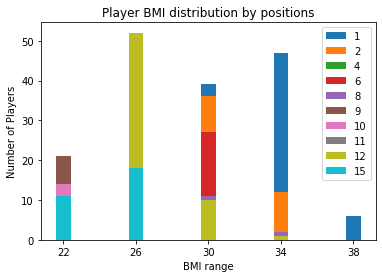

In [57]:
for pos in set(playerdf['Pos']):
    plt.bar( list(buckets[pos]['BMI'].keys()), list(buckets[pos]['BMI'].values()) )
    plt.xticks( list(buckets[pos]['BMI'].keys()) )
    plt.title( 'Player BMI distribution by positions' )
    plt.xlabel( 'BMI range' )
    plt.ylabel( 'Number of Players' )
    plt.legend(set(playerdf['Pos']))

In [58]:
buckets[9]['BMI']
[bucket[9[['BMI'].values()]

{22: 21, 26: 28, 30: 3, 34: 0, 38: 0}

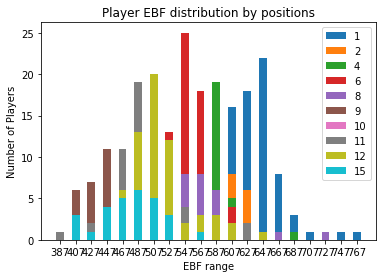

In [175]:
for pos in set(playerdf['Pos']):
    plt.bar( list(buckets[pos]['EBF'].keys()), list(buckets[pos]['EBF'].values()), width = 10 )
    plt.xticks( list(buckets[pos]['EBF'].keys()) )
    plt.title( 'Player EBF distribution by positions' )
    plt.xlabel( 'EBF range' )
    plt.ylabel( 'Number of Players' )
    plt.legend(set(playerdf['Pos']))

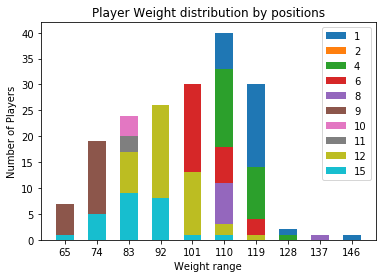

In [173]:
for pos in set(playerdf['Pos']):
    plt.bar( list(buckets[pos]['W-met(kg)'].keys()), list(buckets[pos]['W-met(kg)'].values()), width = 5 )
    plt.xticks( list(buckets[pos]['W-met(kg)'].keys()) )
    plt.title( 'Player Weight distribution by positions' )
    plt.xlabel( 'Weight range' )
    plt.ylabel( 'Number of Players' )
    plt.legend(set(playerdf['Pos']))

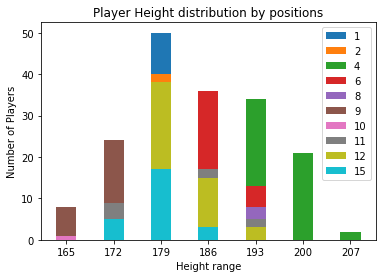

In [168]:
for pos in set(playerdf['Pos']):
    plt.bar( list(buckets[pos]['H-met(cm)'].keys()), list(buckets[pos]['H-met(cm)'].values()), width = 3 )
    plt.xticks( list(buckets[pos]['H-met(cm)'].keys()) )
    plt.title( 'Player Height distribution by positions' )
    plt.xlabel( 'Height range' )
    plt.ylabel( 'Number of Players' )
    plt.legend(set(playerdf['Pos']))

# Next Steps

iterate over rows by Pos. Create Dictionary key: position, value: list of EBFs for position. Calculate mean, variance, standard deviation, median, and mode for each position and store in seperate dictionary.

convert dictionaries to np arrays.

Retrieve injuries from 2015 RWC.


practice K-means by running k-means on dataframe.

linear regress to predict growth of players over RWC's

create a NN to determine a players position based upon BMI, EBF, H, and W

EBF is equal to height divided by weight then multiplied by 1000

In [147]:
playerdf['BMI'].var()

11.100237114724232

In [1289]:
positionalStats = {}

for row,player in playerdf.iterrows():
    if player['EBF'] == '???':
        continue
    if player['Pos'] not in positionalStats:
        positionalStats[player['Pos']] = {'EBF' : [player['EBF']]}
        positionalStats[player['Pos']]['BMI'] = [player['BMI']]
    else:
        positionalStats[player['Pos']]['EBF'].append(player['EBF'])
        positionalStats[player['Pos']]['BMI'].append(player['BMI'])

In [1290]:
from math import *

In [1291]:
for key in positionalStats:
    positionalStats[key]['avg BMI'] = sum(positionalStats[key]['BMI'])/len(positionalStats[key]['BMI'])
    positionalStats[key]['Variance BMI'] = [(value-positionalStats[key]['avg BMI'])**2 for value in positionalStats[key]['BMI']]
    positionalStats[key]['Variance BMI'] = sum(positionalStats[key]['Variance BMI'])/len(positionalStats[key]['Variance BMI'])
    positionalStats[key]['Standard Dev BMI'] = sqrt(positionalStats[key]['Variance BMI'])
    positionalStats[key]['min BMI'] = positionalStats[key]['BMI'][0]
    positionalStats[key]['max BMI'] = positionalStats[key]['BMI'][-1]
    positionalStats[key]['avg EBF'] = sum(positionalStats[key]['EBF'])/len(positionalStats[key]['EBF'])
    positionalStats[key]['Variance EBF'] = [(value-positionalStats[key]['avg EBF'])**2 for value in positionalStats[key]['EBF']]
    positionalStats[key]['Variance EBF'] = sum(positionalStats[key]['Variance EBF'])/len(positionalStats[key]['Variance EBF'])
    positionalStats[key]['Standard Dev EBF'] = sqrt(positionalStats[key]['Variance EBF'])
    positionalStats[key]['min EBF'] = positionalStats[key]['EBF'][0]
    positionalStats[key]['max EBF'] = positionalStats[key]['EBF'][-1]
    del positionalStats[key]['BMI'], positionalStats[key]['EBF']

In [1292]:
positionalStats = pd.DataFrame(positionalStats)

In [1293]:
#distributions

In [1298]:
positionalStats = positionalStats.T
positionalStats

,avg BMI,Variance BMI,Standard Dev BMI,min BMI,max BMI,avg EBF,Variance EBF,Standard Dev EBF,min EBF,max EBF
1,63.464872,16.481665,4.059762,50.537634,78.680203,634.701031,1649.034329,40.608304,505.0,787.0
2,58.896566,13.014126,3.607510,46.073298,67.777778,588.981481,1306.499657,36.145534,461.0,678.0
4,57.215413,16.274068,4.034113,43.814433,68.965517,571.916667,1618.048611,40.224975,438.0,690.0
6,55.610525,11.698732,3.420341,45.714286,63.492063,555.837500,1164.086094,34.118706,457.0,635.0
8,58.326613,15.468848,3.933046,53.763441,73.604061,583.518519,1546.990398,39.331799,538.0,736.0
9,46.945387,14.465216,3.803316,38.690476,57.923497,469.403846,1441.779216,37.970768,387.0,579.0
10,49.209008,14.521512,3.810710,41.304348,62.162162,493.022727,1412.431302,37.582327,413.0,622.0
11,50.913989,16.331065,4.041171,39.325843,64.285714,509.115942,1644.943079,40.557898,393.0,643.0
12,52.220819,15.251770,3.905351,44.505495,65.573770,521.927536,1528.009242,39.089759,445.0,656.0
15,48.777907,13.592988,3.686867,41.489362,57.512953,487.827586,1361.521998,36.898808,415.0,575.0
